# Classifier iterations
> This is an iteration of the classifier, using the augmented data set, in order to improve the accuracy of the model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#negative_words file
df = pd.read_csv('negative_words(Julio).csv')
df = df.drop(columns=['original']) #drop it since it contains the concept with an * in it

neg_words = [] 
for _, row in df.iterrows():
    for item in row:
        if pd.notnull(item):
            neg_words.append(item.strip())

In [ ]:
print(len(neg_words))

1616


In [ ]:
#Drop duplicates in neg_words:
neg_words = list(set(neg_words))

len(neg_words)

1599

In [ ]:
#moral_foundations_dictionary file:
df = pd.read_csv('moral_foundations_dictionary(Julio).csv')
df = df[['categories','word_examples']]

virtue = []
vice = []
for _, row in df.iterrows():
    if pd.notnull(row['word_examples']):
        words = row['word_examples'].split(',')
        words = [word.strip() for word in words]
        if 'Virtue' in row['categories']:
            virtue.extend(words)
        elif 'Vice' in row['categories']:
            vice.extend(words)
        else:
            print(words)

['moralidad']
['moral']
['etica']
['etico']
['principios']
['valores']
['bueno', 'buena']
['bondadoso']
['correcto']
['erroneo', 'equivocado', 'incorrecto', 'malo']
['justicia']
['fechoria', 'pecado', 'indebido']
['virtud']
['vicioso']
['moralidad']
['etica']


In [ ]:
virtue.extend(['moralidad','moral','etica','etico','principios','valores','bueno','buena','bondadoso','correcto','justicia','virtud','moralidad','etica'])
vice.extend(['erroneo','equivocado','incorrecto','malo','fechoria','pecado','indebido','vicioso'])
#Drop duplicates in virtue and vice:
virtue = list(set(virtue))
vice = list(set(vice).union(set(neg_words)))

In [ ]:
print('vice examples: ', vice[:10])
print('virtue examples: ', virtue[:10])

print('vice length: ', len(vice))
print('virtue length: ', len(virtue))
print('total words:', len(vice) + len(virtue))

print('vice proportion: ', round(len(vice)/(len(vice) + len(virtue)),2)) 
print('virtue proportion: ', round(len(virtue)/(len(vice) + len(virtue)),2))

vice examples:  ['fracasara', 'reprimo', 'apurar', 'fastidia', 'castigabamos', 'gimoteando', 'fracasados', 'molesto', 'denigrar', 'aplazimiento']
virtue examples:  ['unificar', 'madre', 'justicia', 'honradez', 'pacificista', 'beneficiar', 'camarilla', 'compasion', 'patria', 'abstemio']
vice length:  1691
virtue length:  210
total words: 1901
vice proportion:  0.89
virtue proportion:  0.11


In [ ]:
#eliminate accents from words:
import unidecode
vice = [unidecode.unidecode(word) for word in vice]
virtue = [unidecode.unidecode(word) for word in virtue]

#replace 'ñ' for 'n':
vice = [word.replace('ñ','n') for word in vice]
virtue = [word.replace('ñ','n') for word in virtue]

print('vice examples: ', vice[:10])
print('virtue examples: ', virtue[:10])

vice examples:  ['fracasara', 'reprimo', 'apurar', 'fastidia', 'castigabamos', 'gimoteando', 'fracasados', 'molesto', 'denigrar', 'aplazimiento']
virtue examples:  ['unificar', 'madre', 'justicia', 'honradez', 'pacificista', 'beneficiar', 'camarilla', 'compasion', 'patria', 'abstemio']


In [ ]:
#Load the embeddings to data frame:
def load_embeddings(file_path):
    word_to_vec = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            word_to_vec[word] = vector
    return word_to_vec

word_to_vec = load_embeddings('vectorspol.txt')

In [ ]:
#a function to get if a word is in the embeddings:
def is_in_embeddings(word, word_to_vec):
    return word in word_to_vec

In [ ]:
print('trabajadora' in word_to_vec)

True


In [ ]:
#Open the files 'extended_vice.txt' and 'extended_virtue.txt' and add the words to their respective lists:
new_vice = set()
new_virtue = set()
with open('extended_vice.txt', 'r', encoding='utf-8') as file:
    for line in file:
        word = line.split(',')
        word = word[0].strip()
        new_vice.add(word)

with open('extended_virtue.txt', 'r', encoding='utf-8') as file:
    for line in file:
        word = line.split(',')
        word = word[0].strip()
        new_virtue.add(word)


In [ ]:

set_vice = set(vice)
set_virtue = set(virtue)

vice_words = set_vice.union(new_vice)
virtue_words = set_virtue.union(new_virtue)

vices = list(vice_words)
virtues = list(virtue_words)

print('vice length: ', len(vices))
print('virtue length: ', len(virtues))
print('total words:', len(vices) + len(virtues))  
print('vice proportion: ', round(len(vices)/(len(vices) + len(virtues)),2))
print('virtue proportion: ', round(len(virtues)/(len(vices) + len(virtues)),2))

vice length:  2069
virtue length:  357
total words: 2426
vice proportion:  0.85
virtue proportion:  0.15


In [ ]:
def list_to_vec(vice, virtue, word_to_vec):
    '''Returns the vector representation of a list of words in a df'''
    data = {'word': [], 'vector': [], 'category': []}
    words_notin = []
    for word in vice:
        if word in word_to_vec.keys():
            data['word'].append(word)
            data['vector'].append(word_to_vec[word])
            data['category'].append(0.0) #vice will be represented as 0
        else:
            data['word'].append(word)
            data['vector'].append(np.nan)
            data['category'].append(0.0)
            words_notin.append(word)
    
    for word in virtue:
        if word in word_to_vec.keys():
            data['word'].append(word)
            data['vector'].append(word_to_vec[word])
            data['category'].append(1.0) #virtue will be represented as 1
        else:
            data['word'].append(word)
            data['vector'].append(np.nan)
            data['category'].append(1.0)
            words_notin.append(word)

    df = pd.DataFrame(data)
    return df, words_notin


In [ ]:

df,words_notin = list_to_vec(vices,virtues,word_to_vec)
df2= pd.DataFrame()
# Asigna la lista como una nueva columna del DataFrame
df2['words not in embeddings'] = words_notin

total = len(df)
print('Total words: ',total)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
print('Total words after dropping NaN: ',len(df))
print('∆: ',total-len(df))
print('∆%:', round((total-len(df))/total*100,2) )
df

Total words:  2426
Total words after dropping NaN:  1779
∆:  647
∆%: 26.67


,word,vector,category
0,fracasara,"[-0.338745, -0.273629, 0.022064, 0.162251, -0....",0.0
1,necesitados,"[0.166012, 0.452693, -0.239362, 0.188201, 0.35...",0.0
2,zombi,"[0.10323, -0.165866, 0.140112, 0.200629, 0.306...",0.0
3,inutiles,"[-0.190367, -0.062187, -0.452188, 0.357089, -0...",0.0
4,fracasados,"[0.675717, 0.574583, -0.686004, -0.049297, -0....",0.0
...,...,...,...
1774,santa,"[-0.075321, 0.027227, 0.458244, 0.018088, -0.1...",1.0
1775,empatia,"[-0.079985, 0.049216, -0.123454, 0.110934, 0.0...",1.0
1776,etica,"[-0.098628, 0.139114, 0.198292, -0.141415, 0.2...",1.0
1777,pacificar,"[0.158702, 0.28569, -0.371642, 0.257582, -0.13...",1.0


In [ ]:
df = df[['word','category']]
df.to_csv('augmented_moral_dict.csv',index=False)

In [ ]:
#write a function to return a boolean if a word is in the embeddings:
def is_in_embeddings(word,word_to_vec):
    '''Returns a boolean if the word is in the embeddings'''
    return word in word_to_vec.keys()

print(is_in_embeddings('tortura',word_to_vec))

True


In [ ]:
df

,word,category
0,fracasara,0.0
1,necesitados,0.0
2,zombi,0.0
3,inutiles,0.0
4,fracasados,0.0
...,...,...
1774,santa,1.0
1775,empatia,1.0
1776,etica,1.0
1777,pacificar,1.0


In [ ]:
#Virtue words
vice_df = df[df['category'] == 0.0][['word','category']]
vice_df.sort_values(by='word',inplace=True)

In [ ]:
#Vice words
virtue_df = df[df['category'] == 1.0][['word','category']].reset_index(drop=True)
virtue_df.sort_values(by='word',inplace=True)

In [ ]:
vice_df.to_csv('vice_tags.csv',index=False)
virtue_df.to_csv('virtue_tags.csv',index=False)


In [ ]:
#Write a function that checks the first 4 characters(or all its characters if it has less than four) of each word in the dataframe and returns all the words that start with the same 4 characters:
def get_words_with_same_start(df):
    words = df['word'].tolist()
    count = 0
    for word in words:
        words_without_word = [word2 for word2 in words if word2 != word]
        for word2 in words_without_word:
            if len(word) >= 8:
                chars = word[:6]
            elif len(word) > 5:
                chars = word[:5]
            else:
                chars = word[:4]
                
            if word2.startswith(chars) and df[df['word'] == word]['category'].values[0] != df[df['word'] == word2]['category'].values[0]:
                    print(df[df['word'] == word][['word','category']], df[df['word'] == word2][['word','category']])
                    count += 1
            
    print(count)



In [ ]:
get_words_with_same_start(df)

        word  category
15  sencilla       0.0           word  category
1654  sencillo       1.0


     word  category
97  comun       0.0            word  category
1528  comunidad       1.0
     word  category
97  comun       0.0            word  category
1531  comunista       1.0
     word  category
97  comun       0.0              word  category
1686  comunitario       1.0
     word  category
97  comun       0.0          word  category
1696  comunal       1.0
     word  category
97  comun       0.0         word  category
1718  comuna       1.0
         word  category
153  patriota       0.0             word  category
1527  patriotico       1.0
       word  category
170  servil       0.0         word  category
1460  servir       1.0
       word  category
170  servil       0.0           word  category
1666  servicio       1.0
              word  category
192  conservadores       0.0            word  category
1690  conservar       1.0
           word  category
213  mantenidos       0.0           word  category
1474  mantener       1.0
        word  category
255   carino       0.0
16

In [ ]:
#open 'vice_extended.csv' and 'virtue_extended.csv' and add the words to the respective lists removing the tag:
vice_extended = pd.read_csv('vice_extended.csv')
vice_extended = list(vice_extended['word'])

virtue_extended = pd.read_csv('virtue_extended.csv')
virtue_extended = list(virtue_extended['word'])

df,_ = list_to_vec(vice_extended,virtue_extended,word_to_vec)
df

,word,vector,category
0,abandona,"[0.630041, -0.258119, 0.088701, -0.330386, -0....",0.0
1,abandonan,"[0.107993, -0.263088, -0.196943, -0.380365, -0...",0.0
2,abandonar,"[0.310727, 0.199741, 0.150028, -0.11023, -0.49...",0.0
3,abandonara,"[-0.066084, -0.31525, -0.004642, -0.209981, 0....",0.0
4,abandonaron,"[-0.320752, 0.134642, -0.049916, -0.393673, -0...",0.0
...,...,...,...
1772,virgen,"[0.130208, 0.131928, 0.598172, -0.632934, -0.5...",1.0
1773,virtud,"[0.324042, 0.211036, 0.205961, 0.526632, 0.141...",1.0
1774,vista,"[-0.108929, 0.135878, 0.652691, -0.00223, -0.0...",1.0
1775,voluntaria,"[0.339912, -0.016379, -0.495883, -0.016938, 0....",1.0


## Iteration one model training

/Users/gerardoguerrero/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


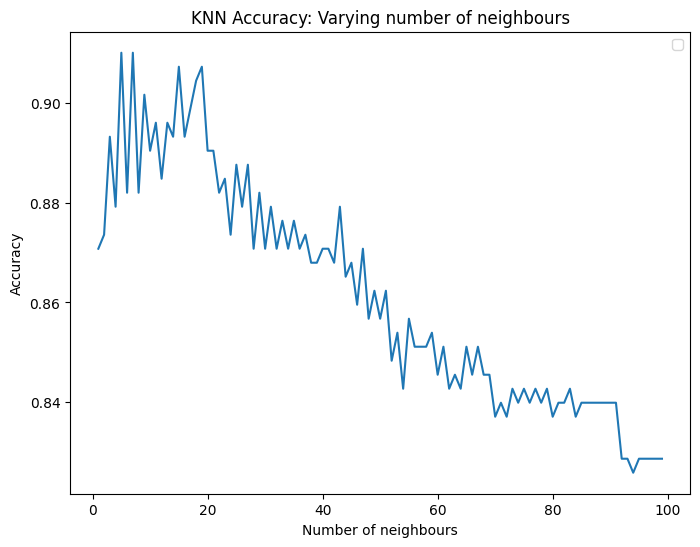

Best accuracy and number of neighbours:  (5, 0.9101123595505618)


In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df['vector'], df['category'], test_size=0.2, random_state=21,stratify=df['category'])

X_train = X_train.to_list()
X_test = X_test.to_list()

y_train = y_train.to_list()
y_test = y_test.to_list()   

test_accuracies = {}
neighbours = range(1, 100)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    test_accuracies[neighbour] = knn.score(X_test, y_test)
    
plt.figure(figsize=(8,6))
plt.title('KNN Accuracy: Varying number of neighbours')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()))
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

print('Best accuracy and number of neighbours: ', max(test_accuracies.items(), key=lambda x: x[1]))

In [ ]:
X = np.array(df['vector'].tolist())
y = np.array(df['category'].tolist())

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
#Adjs found in comments using spaCy library:
adjs = set()
with open('adjs_comments.txt', 'r', encoding='utf-8') as file:
    for line in file:
        word = line.strip()
        if word not in vice_extended and word not in virtue_extended:
            adjs.add(word)

adjs = list(adjs)
print(adjs[:10])
print(len(adjs))

['grandecito', 'quieroen', 'suficiente', 'jajaja', 'comodinos', 'terminada', 'cortos', 'iluso', 'descerebrado', 'senor']
1016


In [ ]:
adj_tag = {}
for adj in adjs:
    if adj in word_to_vec.keys():
        tag = knn.predict([word_to_vec[adj]])
        adj_tag[adj] = tag[0]
        
print(list(adj_tag.items())[:100])

df3 = pd.DataFrame(list(adj_tag.items()), columns=['adjective', 'category'])
df3.sort_values(by='category',inplace=True)
df3.reset_index(drop=True,inplace=True)
df3

[('suficiente', 0.0), ('terminada', 1.0), ('cortos', 0.0), ('senor', 1.0), ('parcial', 0.0), ('aereas', 0.0), ('quedaria', 0.0), ('decentes', 0.0), ('presidentes', 1.0), ('aerea', 0.0), ('sientes', 0.0), ('cuantos', 0.0), ('comerciante', 1.0), ('an', 1.0), ('maya', 1.0), ('inmenso', 1.0), ('pasados', 0.0), ('cubano', 1.0), ('verde', 0.0), ('autonomos', 1.0), ('basto', 0.0), ('genial', 0.0), ('tesla', 0.0), ('lados', 0.0), ('economica', 1.0), ('fisico', 1.0), ('mera', 0.0), ('mejores', 1.0), ('extranjeros', 0.0), ('ranas', 0.0), ('publico', 1.0), ('sera', 0.0), ('lado', 0.0), ('gubernamental', 1.0), ('vianello', 0.0), ('playeras', 0.0), ('licenciado', 1.0), ('participado', 1.0), ('llamado', 1.0), ('des', 1.0), ('cerebral', 0.0), ('incluida', 1.0), ('presidenciales', 1.0), ('igual', 0.0), ('municipal', 1.0), ('alcaldias', 0.0), ('pri', 0.0), ('ponte', 1.0), ('futuro', 1.0), ('almada', 0.0), ('mega', 0.0), ('creibles', 0.0), ('fortalecio', 0.0), ('afecto', 0.0), ('humano', 1.0), ('ala', 0

,adjective,category
0,suficiente,0.0
1,encontraras,0.0
2,curado,0.0
3,descansa,0.0
4,aclaro,0.0
...,...,...
358,pequenos,1.0
359,vivos,1.0
360,acompano,1.0
361,pequeno,1.0


In [ ]:
df3.to_csv('predicted_tag(second_run).csv',index=False)
